In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.ndimage import shift

# Função para deslocar a imagem
def shift_image(image, dx, dy):
    """Desloca a imagem MNIST em dx pixels horizontalmente e dy pixels verticalmente."""
    shifted_image = shift(image.reshape(28, 28), [dy, dx], cval=0).reshape(28 * 28)
    return shifted_image

# Carregar o dataset MNIST usando sklearn
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Separar conjunto de treinamento e teste
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# Expandir o conjunto de treinamento
expanded_X_train = []
expanded_y_train = []

for img, label in zip(X_train, y_train):
    expanded_X_train.append(img)
    expanded_y_train.append(label)
    
    # Adicionar imagens deslocadas
    img_reshaped = img.reshape(28, 28)
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        shifted_img = shift_image(img_reshaped, dx, dy)
        expanded_X_train.append(shifted_img)
        expanded_y_train.append(label)

expanded_X_train = np.array(expanded_X_train)
expanded_y_train = np.array(expanded_y_train)

# Treinar o modelo SGD
sgd = SGDClassifier(max_iter=1000, random_state=42)
sgd.fit(expanded_X_train, expanded_y_train)

# Avaliar o modelo
y_pred = sgd.predict(X_test)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.94      0.96      0.95      1135
           2       0.97      0.77      0.86      1032
           3       0.79      0.92      0.85      1010
           4       0.84      0.94      0.89       982
           5       0.78      0.75      0.77       892
           6       0.91      0.95      0.93       958
           7       0.89      0.91      0.90      1028
           8       0.80      0.83      0.81       974
           9       0.91      0.72      0.80      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.88      0.87     10000

Matriz de Confusão:
 [[ 959    1    0    1    3    6    5    1    3    1]
 [   0 1093    2    6    0    2    5    1   26    0]
 [   9   12  797   77   24   11   20   23   52    7]
 [   6    5    7  930    4   18 

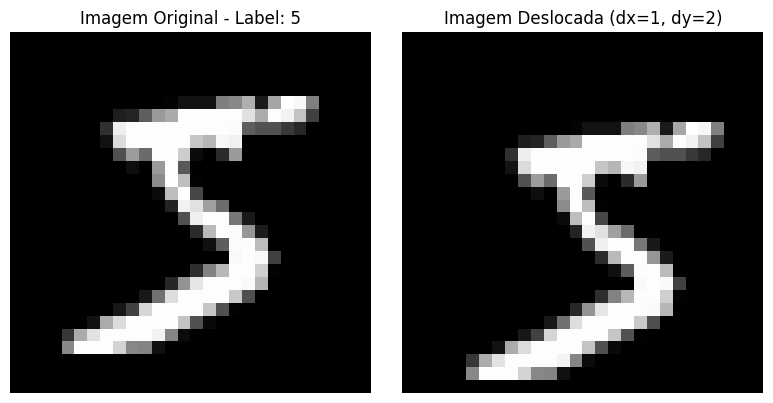

In [3]:
import matplotlib.pyplot as plt
from scipy.ndimage import shift
import numpy as np
from sklearn.datasets import fetch_openml

# Função para deslocar a imagem
def shift_image(image, dx, dy):
    """
    Desloca uma imagem MNIST em dx pixels horizontalmente e dy pixels verticalmente.
    """
    shifted_image = shift(image.reshape(28, 28), [dy, dx], cval=0).reshape(28, 28)
    return shifted_image

# Carregar o dataset MNIST usando sklearn
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Selecionar uma imagem (por exemplo, a primeira do dataset)
original_image = X[0]
label = y[0]

# Mover a imagem (exemplo: 2 pixels para baixo e 1 pixel para a direita)
dx, dy = 1, 2
shifted_image = shift_image(original_image, dx, dy)

# Plotar a imagem original e a deslocada
plt.figure(figsize=(8, 4))

# Imagem original
plt.subplot(1, 2, 1)
plt.title(f"Imagem Original - Label: {label}")
plt.imshow(original_image.reshape(28, 28), cmap='gray')
plt.axis('off')

# Imagem deslocada
plt.subplot(1, 2, 2)
plt.title(f"Imagem Deslocada (dx={dx}, dy={dy})")
plt.imshow(shifted_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
def flip_image_horizontal(image):
    """
    Inverte a imagem horizontalmente (espelho horizontal).
    """
    return np.fliplr(image.reshape(28, 28)).reshape(28, 28)


In [5]:
def flip_image_vertical(image):
    """
    Inverte a imagem verticalmente (espelho vertical).
    """
    return np.flipud(image.reshape(28, 28)).reshape(28, 28)


In [6]:
def flip_image_total(image):
    """
    Inverte a imagem horizontal e verticalmente.
    """
    return np.flipud(np.fliplr(image.reshape(28, 28))).reshape(28, 28)


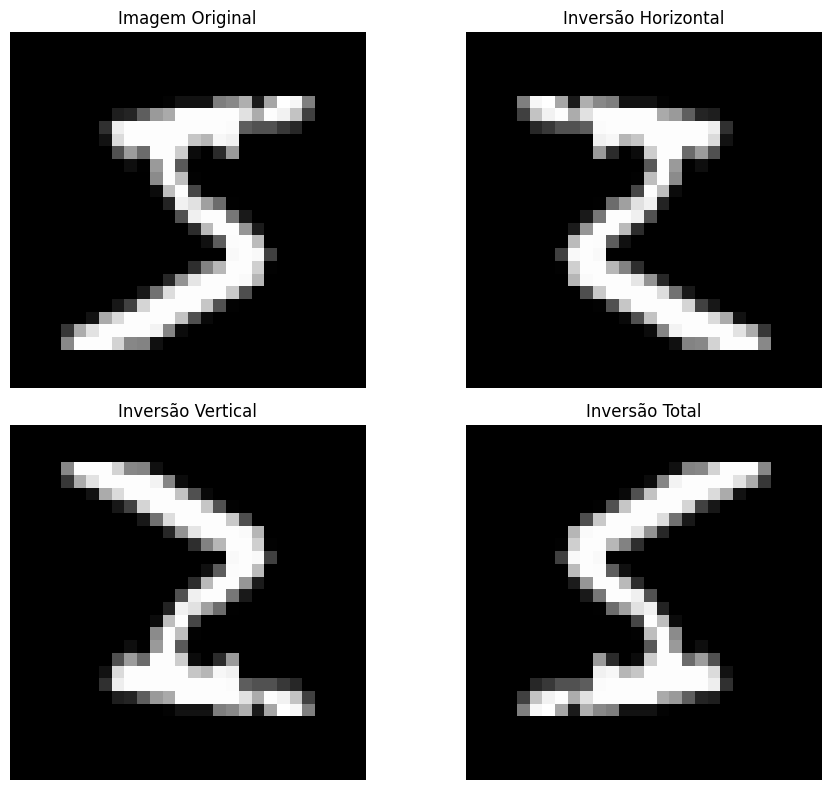

In [7]:
import matplotlib.pyplot as plt

# Carregar uma imagem (original)
original_image = X_train[0].reshape(28, 28)

# Inverter a imagem horizontalmente e verticalmente
flipped_horizontal = flip_image_horizontal(original_image)
flipped_vertical = flip_image_vertical(original_image)
flipped_total = flip_image_total(original_image)

# Exibir as imagens
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title("Imagem Original")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Inversão Horizontal")
plt.imshow(flipped_horizontal, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Inversão Vertical")
plt.imshow(flipped_vertical, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Inversão Total")
plt.imshow(flipped_total, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [17]:
# Inicialize como listas
expanded_X_train = []
expanded_y_train = []

for img, label in zip(X_train, y_train):
    # Adicionar imagem original
    expanded_X_train.append(img)
    expanded_y_train.append(label)

    # Adicionar versões invertidas
    flipped_h = flip_image_horizontal(img)
    flipped_v = flip_image_vertical(img)
    flipped_t = flip_image_total(img)

    expanded_X_train.append(flipped_h.flatten())
    expanded_y_train.append(label)
    
    expanded_X_train.append(flipped_v.flatten())
    expanded_y_train.append(label)
    
    expanded_X_train.append(flipped_t.flatten())
    expanded_y_train.append(label)

# Converta para arrays NumPy
expanded_X_train = np.array(expanded_X_train)
expanded_y_train = np.array(expanded_y_train)


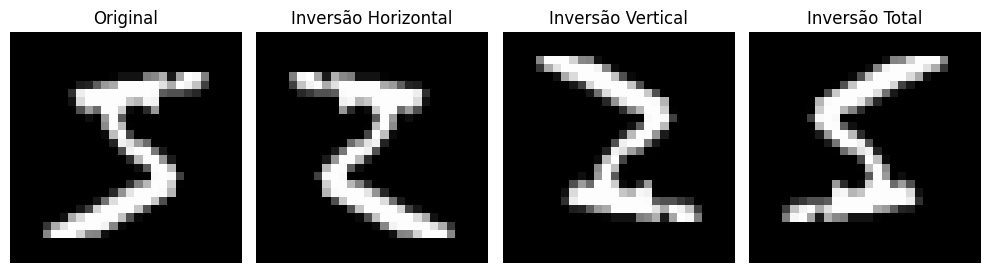

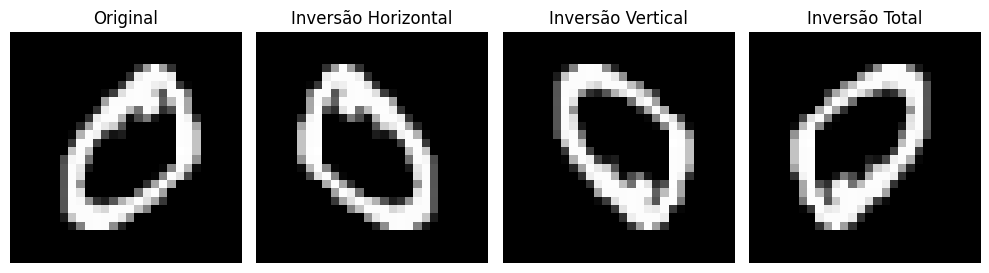

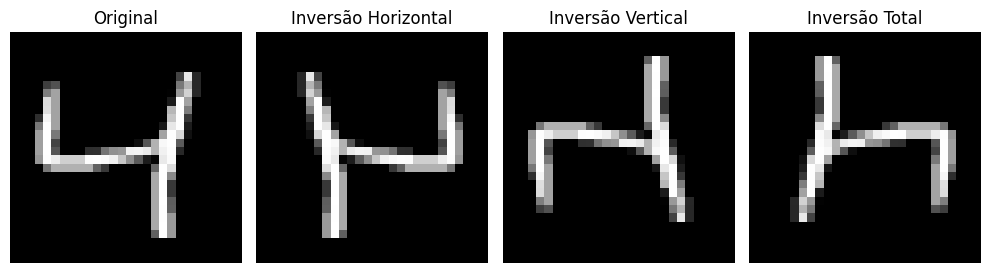

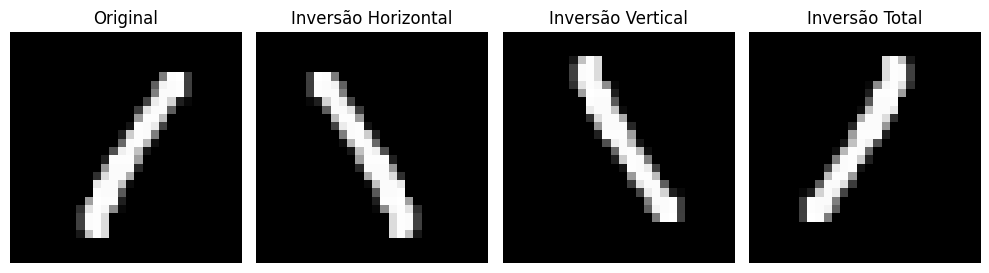

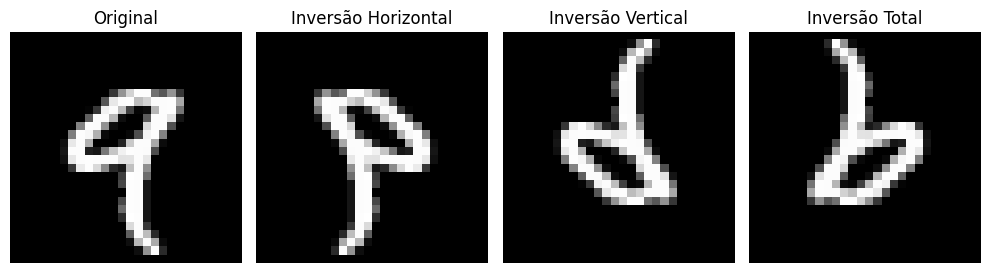

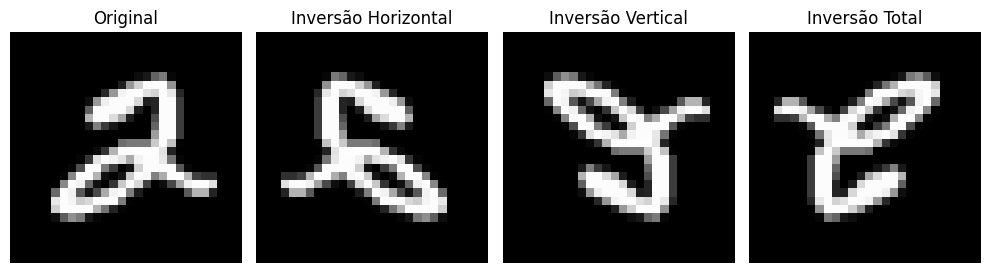

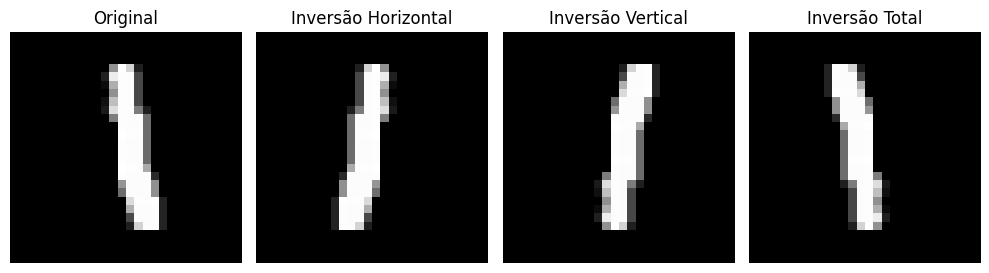

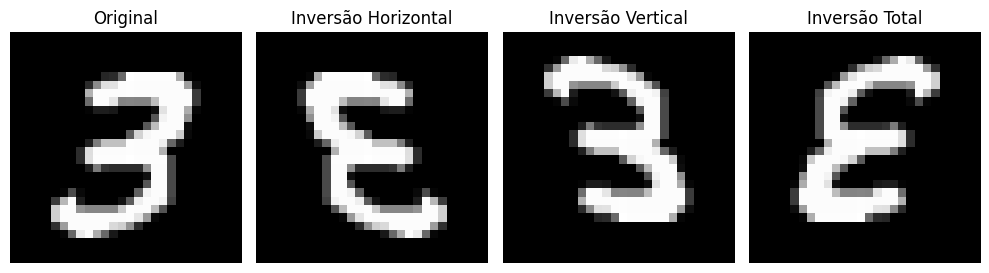

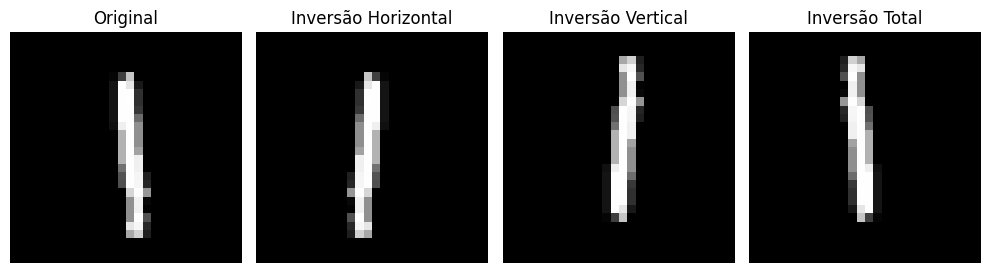

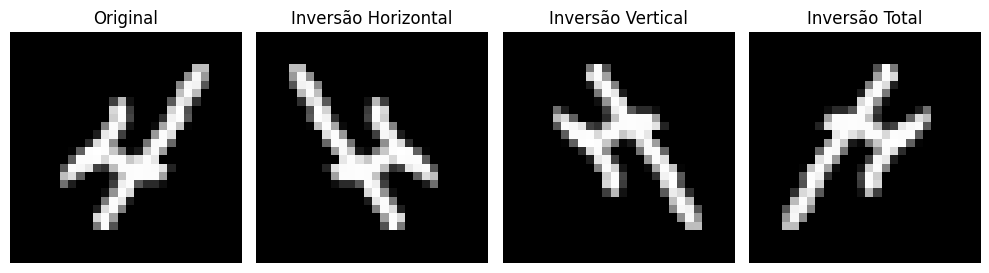

In [18]:
import matplotlib.pyplot as plt

# Inicialize como listas
expanded_X_train = []
expanded_y_train = []

# Definir contador para exibir apenas algumas imagens
counter = 0

for img, label in zip(X_train, y_train):
    if counter < 10:  # Limitar a exibição a 10 conjuntos de imagens para não sobrecarregar
        plt.figure(figsize=(10, 4))

        # Adicionar imagem original
        expanded_X_train.append(img)
        expanded_y_train.append(label)

        plt.subplot(1, 4, 1)
        plt.title("Original")
        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.axis('off')

        # Adicionar versões invertidas
        flipped_h = flip_image_horizontal(img)
        flipped_v = flip_image_vertical(img)
        flipped_t = flip_image_total(img)

        expanded_X_train.append(flipped_h.flatten())
        expanded_y_train.append(label)

        plt.subplot(1, 4, 2)
        plt.title("Inversão Horizontal")
        plt.imshow(flipped_h, cmap='gray')
        plt.axis('off')

        expanded_X_train.append(flipped_v.flatten())
        expanded_y_train.append(label)

        plt.subplot(1, 4, 3)
        plt.title("Inversão Vertical")
        plt.imshow(flipped_v, cmap='gray')
        plt.axis('off')

        expanded_X_train.append(flipped_t.flatten())
        expanded_y_train.append(label)

        plt.subplot(1, 4, 4)
        plt.title("Inversão Total")
        plt.imshow(flipped_t, cmap='gray')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    counter += 1

# Converta para arrays NumPy
expanded_X_train = np.array(expanded_X_train)
expanded_y_train = np.array(expanded_y_train)
